# **Q 4.1**
Import the csv file of the stock which contained the Bollinger columns as well.

Create a new column 'Call' , whose entries are -

'Buy' if the stock price is below the lower Bollinger band
'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band
'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band
'Short' if the stock price is above the upper Bollinger band
Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)

Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [0]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/internship/week3.csv').dropna()

In [0]:
df['Middle_Band'] = (df['Upper_Band']+ df['Lower_Band'])/2

In [3]:
df

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,vwap,Day_Perc_Change,Trend,14_day_Avg,14_day_std,Upper_Band,Lower_Band,Middle_Band
13,2017-06-01,INFY,EQ,977.05,969.30,979.70,958.55,971.25,971.40,969.49,2754303,2.670263e+09,81421,1822506,66.17,2017,6,969.320340,-0.005783,Slight Negative,968.671429,15.981320,1000.634068,936.708789,968.671429
14,2017-06-02,INFY,EQ,971.40,973.40,975.45,964.20,966.00,969.45,968.76,1958983,1.897793e+09,48927,1396644,71.29,2017,6,969.326214,-0.002007,Slight or No change,969.950000,15.203264,1000.356528,939.543472,969.950000
15,2017-06-05,INFY,EQ,969.45,970.00,972.00,957.05,959.00,958.75,961.71,2731349,2.626761e+09,83794,1941199,71.07,2017,6,968.697836,-0.011037,Negative,970.217857,14.950542,1000.118940,940.316774,970.217857
16,2017-06-06,INFY,EQ,958.75,965.00,987.50,964.40,980.00,979.35,980.08,3504343,3.434526e+09,83178,2018029,57.59,2017,6,969.452326,0.021486,Positive,972.114286,14.238105,1000.590495,943.638076,972.114286
17,2017-06-07,INFY,EQ,979.35,985.00,988.90,945.00,959.30,961.30,963.75,6227523,6.001805e+09,139990,2519343,40.45,2017,6,968.540908,-0.018431,Negative,972.082143,14.263787,1000.609717,943.554569,972.082143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2019-05-07,INFY,EQ,718.40,720.40,727.90,718.70,724.40,724.55,724.51,5747536,4.164127e+09,104342,3690425,64.21,2019,5,904.435998,0.008561,Slight Positive,729.810714,10.288365,750.387444,709.233984,729.810714
490,2019-05-08,INFY,EQ,724.55,721.00,726.00,716.50,718.95,719.35,721.65,6247642,4.508603e+09,162077,3950857,63.24,2019,5,904.046560,-0.007177,Slight Negative,727.782143,9.223936,746.230016,709.334270,727.782143
491,2019-05-09,INFY,EQ,719.35,719.15,730.30,715.80,722.00,721.05,724.48,7396525,5.358635e+09,242225,4808832,65.01,2019,5,903.591847,0.002363,Slight or No change,727.321429,9.398542,746.118512,708.524346,727.321429
492,2019-05-10,INFY,EQ,721.05,720.80,726.00,715.00,716.50,716.85,717.88,8352335,5.995942e+09,181229,5545377,66.39,2019,5,903.069330,-0.005825,Slight Negative,726.803571,9.781625,746.366821,707.240322,726.803571


**Creating a new column 'Call'**

In [4]:
def select_call(df):
    if df['Close Price'] < df['Lower_Band']:
        return "Buy"
    if df['Close Price'] > df['Lower_Band'] and df['Close Price'] < df['Middle_Band']:
        return "Hold Buy/ Liquidate Short"
    if df['Close Price'] > df['Middle_Band'] and df['Close Price'] < df['Upper_Band']:
        return "Hold Short/ Liquidate Buy"
    if df['Close Price'] > df['Upper_Band']:
        return "Short"
df = df.assign(Call = df.apply(select_call, axis=1))
df.head()


,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,vwap,Day_Perc_Change,Trend,14_day_Avg,14_day_std,Upper_Band,Lower_Band,Middle_Band,Call
13,2017-06-01,INFY,EQ,977.05,969.3,979.70,958.55,971.25,971.40,969.49,2754303,2.670263e+09,81421,1822506,66.17,2017,6,969.320340,-0.005783,Slight Negative,968.671429,15.981320,1000.634068,936.708789,968.671429,Hold Short/ Liquidate Buy
14,2017-06-02,INFY,EQ,971.40,973.4,975.45,964.20,966.00,969.45,968.76,1958983,1.897793e+09,48927,1396644,71.29,2017,6,969.326214,-0.002007,Slight or No change,969.950000,15.203264,1000.356528,939.543472,969.950000,Hold Buy/ Liquidate Short
15,2017-06-05,INFY,EQ,969.45,970.0,972.00,957.05,959.00,958.75,961.71,2731349,2.626761e+09,83794,1941199,71.07,2017,6,968.697836,-0.011037,Negative,970.217857,14.950542,1000.118940,940.316774,970.217857,Hold Buy/ Liquidate Short
16,2017-06-06,INFY,EQ,958.75,965.0,987.50,964.40,980.00,979.35,980.08,3504343,3.434526e+09,83178,2018029,57.59,2017,6,969.452326,0.021486,Positive,972.114286,14.238105,1000.590495,943.638076,972.114286,Hold Short/ Liquidate Buy
17,2017-06-07,INFY,EQ,979.35,985.0,988.90,945.00,959.30,961.30,963.75,6227523,6.001805e+09,139990,2519343,40.45,2017,6,968.540908,-0.018431,Negative,972.082143,14.263787,1000.609717,943.554569,972.082143,Hold Buy/ Liquidate Short


In [5]:
df['Call'].value_counts()

Hold Short/ Liquidate Buy    250
Hold Buy/ Liquidate Short    189
Short                         28
Buy                           14
Name: Call, dtype: int64

In [0]:
x=pd.DataFrame(data=df,columns=['Close Price','Upper_Band','Middle_Band','Lower_Band'])
y=pd.DataFrame(data=df,columns=['Call'])

In [7]:
df.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,vwap,Day_Perc_Change,14_day_Avg,14_day_std,Upper_Band,Lower_Band,Middle_Band
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,481.0000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,961.277651,960.911435,970.945634,950.849064,960.647297,960.742620,960.984990,6.139954e+06,5.540097e+09,1.375923e+05,3.647034e+06,61.5658,2017.881497,6.525988,973.774431,-0.000153,964.138417,25.578533,1015.295483,912.981351,964.138417
std,223.713690,223.035025,225.951747,221.641684,223.923459,223.983465,224.058975,5.498190e+06,4.812357e+09,8.620744e+04,2.864192e+06,9.8844,0.689573,3.492828,44.102229,0.026651,216.224732,46.899095,246.587861,224.269698,216.224732
min,619.100000,621.000000,628.000000,599.850000,619.500000,619.100000,613.780000,5.457170e+05,5.060941e+08,1.388600e+04,3.077410e+05,26.3800,2017.000000,1.000000,902.652009,-0.486038,647.900000,5.870030,678.960356,278.697542,647.900000
25%,733.700000,735.550000,742.400000,727.150000,734.000000,733.450000,734.790000,3.204762e+06,3.413853e+09,9.437800e+04,2.094305e+06,54.8900,2017.000000,3.000000,935.737376,-0.007186,739.125000,12.632385,767.450260,708.524346,739.125000
50%,954.500000,953.850000,962.950000,945.000000,953.300000,952.300000,953.780000,4.983300e+06,4.644379e+09,1.208480e+05,3.097595e+06,62.1200,2018.000000,7.000000,965.194916,0.000835,958.914286,16.023555,1000.481183,919.323765,958.914286
75%,1152.100000,1147.600000,1164.900000,1140.000000,1149.100000,1152.100000,1153.930000,7.387487e+06,6.089409e+09,1.562510e+05,4.357939e+06,68.5000,2018.000000,10.000000,1008.840739,0.009682,1147.671429,21.177552,1194.094319,1100.762281,1147.671429
max,1441.100000,1449.000000,1467.900000,1430.000000,1440.000000,1441.100000,1451.300000,8.220248e+07,7.662502e+10,1.192900e+06,4.202849e+07,88.7000,2019.000000,12.000000,1069.856520,0.046811,1411.614286,354.974942,1850.841436,1371.967452,1411.614286


**Call is categorical valriable**

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [9]:
y['Call'].value_counts()

Hold Short/ Liquidate Buy    250
Hold Buy/ Liquidate Short    189
Short                         28
Buy                           14
Name: Call, dtype: int64

**Splitting the dataset into test and train set**

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [45]:
ytrain['Call'].value_counts()

Hold Short/ Liquidate Buy    180
Hold Buy/ Liquidate Short    125
Short                         20
Buy                           11
Name: Call, dtype: int64

**Importing different libraries**

In [0]:
from collections import OrderedDict
from sklearn.metrics import confusion_matrix,accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [0]:
max_features=4
classifiers = OrderedDict([
    ( "Nearest Neighbors", KNeighborsClassifier(max_features) ),
    ( "Linear SVM",        SVC(kernel="linear", C=0.025) ),
    ("Logistic Regression",LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr') ),
    ( "RBF SVM",           SVC(gamma=2, C=1) ),
    ( "Gaussian Process",  GaussianProcessClassifier(1.0 * RBF(1.0)) ),
    ( "Decision Tree",     DecisionTreeClassifier(max_depth=5) ),
    ( "Random Forest",     RandomForestClassifier() ),
    ( "Neural Net",        MLPClassifier(alpha=1, max_iter=1000) ),
    ( "AdaBoost",          AdaBoostClassifier() ),
    ( "Naive Bayes",       GaussianNB() ),
    ( "QDA",               QuadraticDiscriminantAnalysis() ),
])

In [48]:
scores = {}
cm={}
for (name, classifier) in classifiers.items():
  classifier.fit(xtrain, ytrain)
  y_new=classifier.predict(xtest)
  scores[name] = accuracy_score(ytest,y_new)
  cm[name]=confusion_matrix(ytest,y_new)

scores = OrderedDict(sorted(scores.items()))
scores


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

OrderedDict([('AdaBoost', 0.503448275862069),
             ('Decision Tree', 0.7172413793103448),
             ('Gaussian Process', 0.9241379310344827),
             ('Linear SVM', 0.5241379310344828),
             ('Logistic Regression', 0.6896551724137931),
             ('Naive Bayes', 0.5172413793103449),
             ('Nearest Neighbors', 0.8551724137931035),
             ('Neural Net', 0.896551724137931),
             ('QDA', 0.7586206896551724),
             ('RBF SVM', 0.7517241379310344),
             ('Random Forest', 0.8482758620689655)])

Gaussian process gives highest accuracy

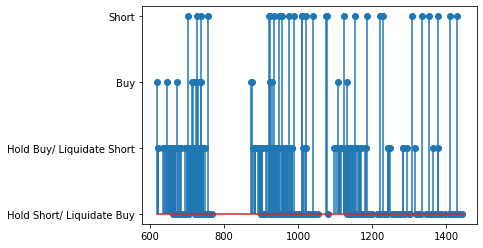

In [15]:
import matplotlib.pyplot as plt
plt.stem(df["Close Price"],df["Call"],use_line_collection=True)
plt.show()

**Adding another stock**

In [0]:
df1 = pd.read_csv('/content/drive/My Drive/internship/LALPATHLAB.csv', parse_dates=['Date'])
df1 = df1[df1.Series == 'EQ' ]
df1.set_index('Date', inplace=True)

In [17]:
df1.isnull().sum()

Symbol                    0
Series                    0
Prev Close                0
Open Price                0
High Price                0
Low Price                 0
Last Price                0
Close Price               0
Average Price             0
Total Traded Quantity     0
Turnover                  0
No. of Trades             0
Deliverable Qty           0
% Dly Qt to Traded Qty    0
dtype: int64

In [0]:
df1['14_day_Avg'] = df1['Close Price'].rolling(14).mean()
df1['14_day_std']=df1['Close Price'].rolling(14).std()


In [19]:
df1.isnull().sum()

Symbol                     0
Series                     0
Prev Close                 0
Open Price                 0
High Price                 0
Low Price                  0
Last Price                 0
Close Price                0
Average Price              0
Total Traded Quantity      0
Turnover                   0
No. of Trades              0
Deliverable Qty            0
% Dly Qt to Traded Qty     0
14_day_Avg                13
14_day_std                13
dtype: int64

In [0]:
df1.dropna(inplace=True)

In [21]:
df1.isnull().sum()

Symbol                    0
Series                    0
Prev Close                0
Open Price                0
High Price                0
Low Price                 0
Last Price                0
Close Price               0
Average Price             0
Total Traded Quantity     0
Turnover                  0
No. of Trades             0
Deliverable Qty           0
% Dly Qt to Traded Qty    0
14_day_Avg                0
14_day_std                0
dtype: int64

In [0]:
df1['Upper_Band'] =df1['14_day_Avg'] + df1['14_day_std']*2
df1['Lower_Band'] =df1['14_day_Avg'] - df1['14_day_std']*2
df1['Middle_Band'] = (df1['Upper_Band']+df1['Lower_Band'])/2


In [23]:
df1.shape

(481, 19)

In [0]:
x_df=pd.DataFrame(data=df1,columns=['Close Price','Upper_Band','Middle_Band','Lower_Band'])
x_df = scaler.fit_transform(x_df)

In [0]:
df1["Call"]=classifiers['Neural Net'].predict(x_df)

In [26]:
df1["Call"].value_counts()

Hold Buy/ Liquidate Short    275
Hold Short/ Liquidate Buy    206
Name: Call, dtype: int64

In [27]:
df1.tail()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14_day_Avg,14_day_std,Upper_Band,Lower_Band,Middle_Band,Call
Date,,,,,,,,,,,,,,,,,,,,
2019-05-07,LALPATHLAB,EQ,1024.95,1015.7,1031.95,1006.9,1013.0,1013.10,1020.66,20113,20528506.75,3628,11587,57.61,1050.325000,17.703702,1085.732404,1014.917596,1050.325000,Hold Buy/ Liquidate Short
2019-05-08,LALPATHLAB,EQ,1013.10,1014.0,1019.85,1001.9,1002.0,1006.10,1010.90,18048,18244734.90,4175,11239,62.27,1048.357143,20.935899,1090.228941,1006.485345,1048.357143,Hold Buy/ Liquidate Short
2019-05-09,LALPATHLAB,EQ,1006.10,1014.0,1014.00,977.7,979.9,982.90,987.36,60539,59773549.10,8169,37303,61.62,1042.471429,26.617878,1095.707185,989.235673,1042.471429,Hold Buy/ Liquidate Short
2019-05-10,LALPATHLAB,EQ,982.90,989.9,994.30,963.6,980.0,980.65,980.71,30568,29978397.15,4618,19097,62.47,1037.225000,31.023519,1099.272039,975.177961,1037.225000,Hold Buy/ Liquidate Short
2019-05-13,LALPATHLAB,EQ,980.65,970.8,996.00,960.0,975.0,976.25,974.21,37187,36228097.15,6798,23772,63.93,1031.003571,33.974552,1098.952675,963.054468,1031.003571,Hold Buy/ Liquidate Short


# **Q 4.2**
Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.
Import the stock data file of your choice
Define 4 new columns , whose values are: 
% change between Open and Close price for the day 
% change between Low and High price for the day 
5 day rolling mean of the day to day % change in Close Price 
5 day rolling std of the day to day % change in Close Price
Create a new column 'Action' whose values are: 
1 if next day's price(Close) is greater than present day's. 
(-1) if next day's price(Close) is less than present day's. 
i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ] 
i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]
Construct a classification model with the 4 new inputs and 'Action' as target
Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

In [74]:
import pandas as pd
df2 = pd.read_csv('/content/drive/My Drive/internship/ITDC.csv')
df2['Date']=pd.to_datetime(df2['Date'])
df2.set_index(df2['Date'],inplace=True)
df2

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2017-05-15,ITDC,EQ,2017-05-15,611.35,616.80,663.20,602.40,648.10,650.15,645.77,217237,1.402861e+08,8827,37494,17.26
2017-05-16,ITDC,EQ,2017-05-16,650.15,654.00,655.95,633.05,639.00,636.70,642.75,55988,3.598617e+07,2853,17726,31.66
2017-05-17,ITDC,EQ,2017-05-17,636.70,638.10,642.90,624.00,624.00,626.75,633.59,23787,1.507112e+07,980,9924,41.72
2017-05-18,ITDC,EQ,2017-05-18,626.75,621.80,624.00,601.50,604.00,604.65,614.44,37216,2.286693e+07,1498,16716,44.92
2017-05-19,ITDC,EQ,2017-05-19,604.65,610.05,618.00,590.90,591.00,594.30,605.41,43801,2.651750e+07,2121,17563,40.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,ITDC,EQ,2019-05-07,264.75,267.00,268.80,253.75,255.05,254.30,259.95,30448,7.914880e+06,1142,12025,39.49
2019-05-08,ITDC,EQ,2019-05-08,254.30,253.90,254.00,251.00,252.85,251.95,252.55,7808,1.971899e+06,333,4711,60.34
2019-05-09,ITDC,EQ,2019-05-09,251.95,251.05,251.80,245.35,245.60,246.25,247.52,9466,2.342985e+06,426,5317,56.17


In [0]:
df2["OC_pct_change"]=(df2['Close Price']-df2['Open Price'])/df2['Open Price']
df2['HL_pct_change']   = (df2['High Price']  - df2['Low Price']  ) / df2['Low Price']
df2['5days_mean_pct'] = df2['Close Price'].pct_change().dropna().rolling(5).mean()
df2['5days_std_pct'] = df2['Close Price'].pct_change().dropna().rolling(5).std()
df2=df2.dropna()

In [76]:
df2

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,OC_pct_change,HL_pct_change,5days_mean_pct,5days_std_pct
Date,,,,,,,,,,,,,,,,,,,
2017-05-22,ITDC,EQ,2017-05-22,594.30,588.10,603.00,559.85,576.90,574.65,580.43,44113,25604656.50,1934,18646,42.27,-0.022870,0.077074,-0.024352,0.009176
2017-05-23,ITDC,EQ,2017-05-23,574.65,581.35,581.35,541.00,553.35,553.80,555.66,41536,23079950.80,2105,13365,32.18,-0.047390,0.074584,-0.027471,0.010211
2017-05-24,ITDC,EQ,2017-05-24,553.80,560.95,561.00,504.05,511.05,516.15,530.21,58400,30964223.75,2741,24353,41.70,-0.079865,0.112985,-0.037942,0.018507
2017-05-25,ITDC,EQ,2017-05-25,516.15,504.00,527.30,497.00,507.10,508.15,510.71,61922,31624393.50,2349,25573,41.30,0.008234,0.060966,-0.033990,0.021144
2017-05-26,ITDC,EQ,2017-05-26,508.15,508.00,517.00,498.00,512.00,511.05,510.33,30179,15401160.00,1226,11628,38.53,0.006004,0.038153,-0.029425,0.027273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,ITDC,EQ,2019-05-07,264.75,267.00,268.80,253.75,255.05,254.30,259.95,30448,7914880.15,1142,12025,39.49,-0.047566,0.059310,-0.009951,0.030724
2019-05-08,ITDC,EQ,2019-05-08,254.30,253.90,254.00,251.00,252.85,251.95,252.55,7808,1971898.75,333,4711,60.34,-0.007680,0.011952,-0.005826,0.028699
2019-05-09,ITDC,EQ,2019-05-09,251.95,251.05,251.80,245.35,245.60,246.25,247.52,9466,2342985.05,426,5317,56.17,-0.019120,0.026289,-0.005617,0.028540


In [0]:
import numpy as np
df2['Action'] = np.where( df2['Close Price'].shift(-1) > df2['Close Price'], 1, -1 )

In [78]:
df2.shape

(489, 20)

In [79]:
df2

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,OC_pct_change,HL_pct_change,5days_mean_pct,5days_std_pct,Action
Date,,,,,,,,,,,,,,,,,,,,
2017-05-22,ITDC,EQ,2017-05-22,594.30,588.10,603.00,559.85,576.90,574.65,580.43,44113,25604656.50,1934,18646,42.27,-0.022870,0.077074,-0.024352,0.009176,-1
2017-05-23,ITDC,EQ,2017-05-23,574.65,581.35,581.35,541.00,553.35,553.80,555.66,41536,23079950.80,2105,13365,32.18,-0.047390,0.074584,-0.027471,0.010211,-1
2017-05-24,ITDC,EQ,2017-05-24,553.80,560.95,561.00,504.05,511.05,516.15,530.21,58400,30964223.75,2741,24353,41.70,-0.079865,0.112985,-0.037942,0.018507,-1
2017-05-25,ITDC,EQ,2017-05-25,516.15,504.00,527.30,497.00,507.10,508.15,510.71,61922,31624393.50,2349,25573,41.30,0.008234,0.060966,-0.033990,0.021144,1
2017-05-26,ITDC,EQ,2017-05-26,508.15,508.00,517.00,498.00,512.00,511.05,510.33,30179,15401160.00,1226,11628,38.53,0.006004,0.038153,-0.029425,0.027273,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,ITDC,EQ,2019-05-07,264.75,267.00,268.80,253.75,255.05,254.30,259.95,30448,7914880.15,1142,12025,39.49,-0.047566,0.059310,-0.009951,0.030724,-1
2019-05-08,ITDC,EQ,2019-05-08,254.30,253.90,254.00,251.00,252.85,251.95,252.55,7808,1971898.75,333,4711,60.34,-0.007680,0.011952,-0.005826,0.028699,-1
2019-05-09,ITDC,EQ,2019-05-09,251.95,251.05,251.80,245.35,245.60,246.25,247.52,9466,2342985.05,426,5317,56.17,-0.019120,0.026289,-0.005617,0.028540,1


In [80]:
df2.isnull().values.any()

False

In [81]:
new_x =df2[['OC_pct_change', 'HL_pct_change', '5days_mean_pct', '5days_std_pct']]
new_y =df2['Action']
new_x = StandardScaler().fit_transform(new_x)
X_train, X_test, Y_train, Y_test = train_test_split(new_x, new_y, test_size=0.3, random_state=42)

random_forest = RandomForestClassifier(n_estimators=100, max_features=2)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
new_x

array([[-0.5447764 ,  0.8630777 , -1.64708565, -0.82579882],
       [-1.29455613,  0.78529606, -1.87030342, -0.7763916 ],
       [-2.28760348,  1.98478832, -2.61969627, -0.38053918],
       ...,
       [-0.43008795, -0.72325987, -0.30634992,  0.09827956],
       [ 0.58048168, -0.24159531, -0.14848097,  0.18278691],
       [-0.86817642,  1.05194834, -1.11930338, -0.13724578]])

In [83]:
accuracy_score( Y_test, random_forest.predict(X_test), normalize=True )

0.4965986394557823

**The simple cumulative daily return is calculated by taking the cumulative product of the daily percentage change**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


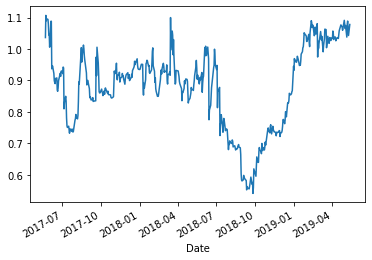

In [89]:
df2['Net Cummulative Returns'] =  ( 1 + (df2['Close Price'].pct_change() * df2['Action']) ).dropna().cumprod()
df2['Net Cummulative Returns'].plot()